<a href="https://colab.research.google.com/github/meteyildirim/samples/blob/main/meister.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meister Challange

Task Definition

The Data

Given is a dataset of all public maps in our database, which have received a rating as well as a category. The base case would be to deveop a predicitive model around either the category or the rating. However, alternatively you are also encouraged come up with any other idea you may have!

The Model

Write a jupyter-notebook where you describe the thought process that went into the given task, from data preparation, feature engineering, parsing, towards training a model. Discuss your process and results visually as well as with text. If you have opted for an alternative idea describe how this type of features might be used by our customers and in which way it would benefit them.


I will implement the following steps in order

1. Overview the Data
2. Create Functions
3. Clean the Data
4. Questions  on the data
5. Feature Engineering
6. Break Down the Data Into Segments
7. Visualize the Data
8. Use the Data to Answer the Questions
9. Textual Analyıs on Data(NLP)

First install some librarries we need

In [1]:
!pip install langdetect

     |████████████████████████████████| 981 kB 14.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=d4bc7c0919db8a3b32aaa50d228d027530e5d35dd975a702be3472234da4a5dc
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


## Overview the Data

This section give brief information about the data

* The data has 7 columns/features and 13560 rows/records.
* 3 features are object type and the rest interger/float type
* Only the 5th feature has missing data and it is just small amount (%3)
* map_rating and map_category_name seem to be most important of the features
* 4 features are only Id's number and seem to carry not very useful information
* Many languages are used in the map_title and idea_title features
* The most frequent map_title is repeated 661 times and it is not in English
* The map_title has 462 unique values which may be useful for further examination
* İdea title has 8575 unique values that is close the number of records. In this form it does not carry categorical information.
* Since, many languages are used in map_title and idea_title, we can explore them seperatly 

In [2]:
# download the data from the repo
!wget https://raw.githubusercontent.com/meteyildirim/samples/main/public_maps.csv
# import of data
import pandas as pd
# read the data to the dataframe
df = pd.read_csv("public_maps.csv")
# show the data head
df.head()

--2022-01-31 22:51:15--  https://raw.githubusercontent.com/meteyildirim/samples/main/public_maps.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1346767 (1.3M) [text/plain]
Saving to: ‘public_maps.csv’

public_maps.csv     100%[===================>]   1.28M  --.-KB/s    in 0.02s   

2022-01-31 22:51:15 (82.0 MB/s) - ‘public_maps.csv’ saved [1346767/1346767]



,map_id,map_title,map_rating,map_category_name,idea_id,idea_parent_id,idea_title
0,116533,PFK/Risikomanagement,50,Business,116533,NaN,My first mindmap
1,116533,PFK/Risikomanagement,50,Business,116534,116533.0,Ideas for my novel ...
2,116533,PFK/Risikomanagement,50,Business,116535,116533.0,Welcome again!
3,116533,PFK/Risikomanagement,50,Business,116536,116535.0,We hope you\'ll have fun\nwith MindMeister ...
4,116533,PFK/Risikomanagement,50,Business,116537,116535.0,... and some great ideas too!


In [3]:
# show the data tail
df.tail()

,map_id,map_title,map_rating,map_category_name,idea_id,idea_parent_id,idea_title
13555,19565257,HACIA UNA PEDAGOGIA\rDIALOGANTE,50,Other,19565556,19565552.0,Medical/Wellness
13556,19565257,HACIA UNA PEDAGOGIA\rDIALOGANTE,50,Other,19565562,19565552.0,Lifestyle/Non-Medical
13557,19565257,HACIA UNA PEDAGOGIA\rDIALOGANTE,50,Other,19567954,19565257.0,Training Program
13558,19565257,HACIA UNA PEDAGOGIA\rDIALOGANTE,50,Other,19567958,19567954.0,Contracted Leaders
13559,19565257,HACIA UNA PEDAGOGIA\rDIALOGANTE,50,Other,19567961,19567954.0,Guest Speakers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13560 entries, 0 to 13559
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   map_id             13560 non-null  int64  
 1   map_title          13560 non-null  object 
 2   map_rating         13560 non-null  int64  
 3   map_category_name  13560 non-null  object 
 4   idea_id            13560 non-null  int64  
 5   idea_parent_id     13098 non-null  float64
 6   idea_title         13560 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 741.7+ KB


In [5]:
df.describe()

,map_id,map_rating,idea_id,idea_parent_id
count,1.356000e+04,13560.000000,1.356000e+04,1.309800e+04
mean,1.957050e+07,49.518732,2.440825e+07,2.264966e+07
std,1.737064e+07,3.067104,7.450748e+07,4.969376e+07
min,1.000000e+00,10.000000,1.000000e+00,1.000000e+00
25%,3.081353e+06,50.000000,3.081603e+06,3.081402e+06
50%,1.575842e+07,50.000000,1.596314e+07,1.596194e+07
75%,3.456388e+07,50.000000,3.640343e+07,3.583141e+07
max,6.319091e+07,50.000000,2.113900e+09,1.964170e+09


In [6]:
df.describe(include=[object])

,map_title,map_category_name,idea_title
count,13560,13560,13560
unique,462,7,8575
top,ДЕРЕВО\nстатей\nYUG.SU,Education,ENTER to add siblings
freq,661,5820,192


Find out unique values for every column

In [7]:
df_nm = df.dropna(axis=1, how='all', inplace=False)
# Let us find out unique values from each features
df_unique_values = pd.Series({col:df_nm[col].unique() for col in df_nm})
# print(df_unique_values)
from prettytable import PrettyTable
t = PrettyTable(['Feature Name', 'Number of unique values for each features'])
for col in df_nm.columns:
  t.add_row([col, len(df_unique_values[col])])
print(t)

# show in graph
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df_nm_plt = pd.DataFrame.from_records(t.rows, columns=t.field_names)

+-------------------+-------------------------------------------+
|    Feature Name   | Number of unique values for each features |
+-------------------+-------------------------------------------+
|       map_id      |                    462                    |
|     map_title     |                    462                    |
|     map_rating    |                     12                    |
| map_category_name |                     7                     |
|      idea_id      |                   13560                   |
|   idea_parent_id  |                    4445                   |
|     idea_title    |                    8575                   |
+-------------------+-------------------------------------------+


## 2. Create Functions

I will keep the functions that I need to use here for the sake of orderness

In [8]:
# For nice title printing
def print_title(title,spc_no=15):
    """ This is just printing in line title"""
    print("\n\n")
    print(" "*spc_no+title.upper()+" "*spc_no)
    print("-"*(2*spc_no+len(title)))

#For cleaning /r /t/ /n 
def clean_txt(dframe):
    """
      removes \n and \t and \r from data frame
      Parameters: dframe : pandas dataframe 
      Return:     dframe : pandas dataframe
    """

    return dframe.replace(to_replace=[r"\\t|\\n|\\r|\\d|\\s", "\t|\n|\r|\d|\s"], value=[" "," "], regex=True, inplace=False)

# For cleaning email and web adresses from the records
def cln_email_web(txt):
  txt = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', txt)
  txt = re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*', "", txt)
  return txt

# For creating new features

from langdetect import detect

def detect_lang(text):
   try:
       return detect(text)
   except:
       return 'unknown'

## 3. Clean the Data

* I will work on only 3 features: idea_parent_id, map_title, idea_title. They need cleaning unlike the rest. 
* Missing values: Since it is just small, I will drop them
* idea_parent_id is float type (19565552.0), for id feature it better to keep it integer type
* map_title and idea_title has many return:"\r", newline:"\n" tab:"\t" that we can clean
* map_title and idea_title has email address, web address that seem to have no relation with the feature name or content, hence they can be removed.




In [9]:
# show 20 sample from data, keep the random_state=1 for reobservation
df.sample(20, random_state=1)

,map_id,map_title,map_rating,map_category_name,idea_id,idea_parent_id,idea_title
7298,49472269,Информационные\rресурсы,50,Education,50155136,50155099.0,Google Account
368,1253351,Time Management Topics,50,Business,1253362,1253359.0,ENTER to add siblings
6526,42052519,EL\rEMPRENDEDOR,50,Education,42130004,42129816.0,with HS coaches and Varsity Players
4895,31341286,the nervous system,50,Education,31342097,31341529.0,Counter Printer
91,836691,“The Importance of Display in the\rPrimary Cla...,50,Business,836920,836691.0,Spanish
763,1948369,Medios de comunicación\rmasiva,50,Business,2733848,2693581.0,1.5 GB up and 256K down
12304,16874655,14 principios de Fayol,50,Other,16882512,16882509.0,equations in two variables\rhave solutions
2243,154039,Ein Lesetagebuch\nerstellen,50,Education,154504,154198.0,Hemsida för konferensen?
35,728945,WAW - Mensuração em\rMídias Sociais,50,Business,728959,728954.0,brevets en cours d\'enregistrement
9399,7009902,Modelo de Ferência,50,Technology,7009911,7011758.0,処理速度の向上


Dropping missing records

Missing values are only in the idea parent id column.

We can either drop entire column or just the rows that has the missing values.

Since they are just afew records WRT all data, I prefer to drop the rows with missing values. We can later examine them and find out the most relevant parent_id

I will keep the new data "ndf" that has no missing values

df: is the orginal dataframe

ndf: is the dataframe without missing values

In [10]:
# we will still have all data in df
# df_nm: df without missing values
ndf= df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13098 entries, 1 to 13559
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   map_id             13098 non-null  int64  
 1   map_title          13098 non-null  object 
 2   map_rating         13098 non-null  int64  
 3   map_category_name  13098 non-null  object 
 4   idea_id            13098 non-null  int64  
 5   idea_parent_id     13098 non-null  float64
 6   idea_title         13098 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 818.6+ KB


The output shows that there is no missing values anymore

Converting idea_parent_id	from float to integer  and show  afew records

In [11]:
ndf["idea_parent_id"] = ndf["idea_parent_id"].astype(int) 
ndf.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,map_id,map_title,map_rating,map_category_name,idea_id,idea_parent_id,idea_title
1,116533,PFK/Risikomanagement,50,Business,116534,116533,Ideas for my novel ...
2,116533,PFK/Risikomanagement,50,Business,116535,116533,Welcome again!


Clean /r, /n etc. and show some samples

In [12]:
ndf = clean_txt(ndf)
ndf.sample(5, random_state=1)

,map_id,map_title,map_rating,map_category_name,idea_id,idea_parent_id,idea_title
11423,11927143,Fundamentals of Journalism,50,Other,13632677,11927143,Zeitzeugen
352,1251463,Online Marketer SMA,50,Business,1251478,1251472,ENTER to add siblings
9110,42920802,MANAGEMENT,50,Productivity,44246917,42920802,New Node
1546,4978815,Seans Game,50,Business,4978826,4978823,ENTER to add siblings
755,1948369,Medios de comunicación masiva,50,Business,2694871,2694719,city councilor and vice-chairman of the council


Clean any web adress or email

In [13]:
import re
ndf['idea_title'] = ndf['idea_title'].apply(cln_email_web)
ndf['map_title'] = ndf['map_title'].apply(cln_email_web)
ndf.sample(5, random_state=33)

,map_id,map_title,map_rating,map_category_name,idea_id,idea_parent_id,idea_title
8113,8536318,The Earth,50,Life,8536321,8536318,Welcome again!
5510,38596945,El problema económico: Escasez y elección,50,Education,38597037,38597034,Volition
12361,16896691,Плюсы &amp; минусы различных источников трафика,50,Other,16896707,16896706,Check out
1255,3857025,Curriculum Vitae,50,Business,3962578,3962577,options
4665,27921807,Procedimiento para la Reparación del Daño y la...,50,Education,28227226,28227219,"If he\'s coaching me, what advice would he giv..."


Show some examples

I use 35.row which is 32.row due to dropped rows

In [14]:
df.iloc[35,:]

map_id                                            728945
map_title            WAW - Mensuração em\rMídias Sociais
map_rating                                            50
map_category_name                               Business
idea_id                                           728959
idea_parent_id                                    728954
idea_title            brevets en cours d\'enregistrement
Name: 35, dtype: object

In [15]:
ndf.iloc[32,:]

map_id                                           728945
map_title            WAW - Mensuração em Mídias Sociais
map_rating                                           50
map_category_name                              Business
idea_id                                          728959
idea_parent_id                                   728954
idea_title           brevets en cours d\'enregistrement
Name: 35, dtype: object

### 3. Questions  on the data

We can some basic informatio about the data

* Does the id columns carry any meaning or usefull information or they are just ID numbers for database organization

* What is average map_rating with respect to categories.

* How many languages used in the data, how is the categories distrubition with repect to data

* How is the min, mean, std of map_rating for each categories?

* Is there any relation among fatures? For example, can map_id represent map_title numerically?

* Can we examine the data under different languages categories?

* Can we do text analysis on idea_title and map_title and get some insight about them?



### Feature Engineering

As we say there are many languages used in the dataset.

We create two columns

One to keep the language of map_title: map_title_lang

The other to keep the language of idea_title: idea_title_lang

In [16]:
# it may take alittle longer - 2 min
ndf['map_title_lang'] = ndf['map_title'].apply(detect_lang)
# it may take alittle longer - 2 min
ndf['idea_title_lang'] = ndf['idea_title'].apply(detect_lang)

In [17]:
# show dataset with new features
ndf.head()

,map_id,map_title,map_rating,map_category_name,idea_id,idea_parent_id,idea_title,map_title_lang,idea_title_lang
1,116533,PFK/Risikomanagement,50,Business,116534,116533,Ideas for my novel ...,id,en
2,116533,PFK/Risikomanagement,50,Business,116535,116533,Welcome again!,id,en
3,116533,PFK/Risikomanagement,50,Business,116536,116535,We hope you\'ll have fun with MindMeister ...,id,en
4,116533,PFK/Risikomanagement,50,Business,116537,116535,... and some great ideas too!,id,en
5,116533,PFK/Risikomanagement,50,Business,116538,116533,Get started!,id,no


In [18]:
# ndf.drop(["map_title_lang","idea_title_lang"],axis=1, inplace=True)
# display(ndf)

For now we only added two new features. There is not much to do with feature engineering

### 6. and 7. Segmatation and Visualiziation of the Data


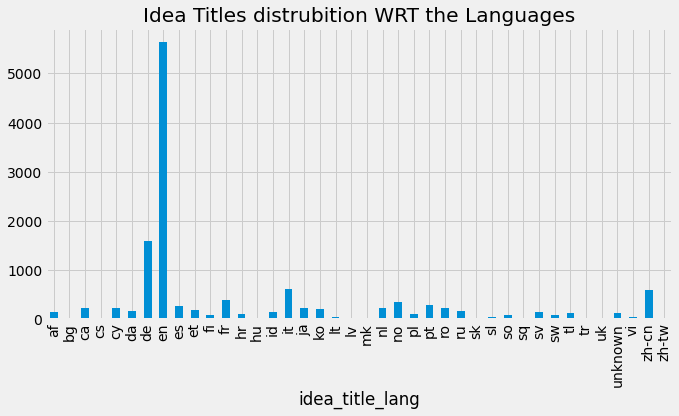

In [19]:
ndf_idea_title_lang = ndf.groupby("idea_title_lang")
ndf_idea_title_lang.size().plot.bar(figsize=(10,5) )
plt.title("Idea Titles distrubition WRT the Languages")
plt.show()

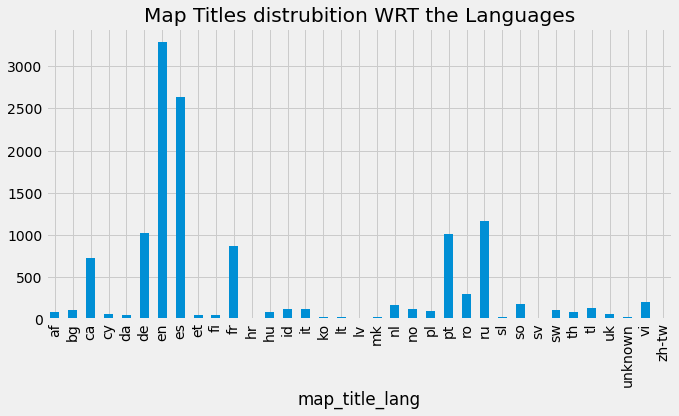

In [20]:
ndf_map_title_lang = ndf.groupby("map_title_lang")
plt.title("Map Titles distrubition WRT the Languages")
ndf_map_title_lang.size().plot.bar(figsize=(10,5))
plt.show()


Comments:

Ideas title are mostly in English

English is leading language in map titles but es, ru, pt, fr, de ca has many entries as well

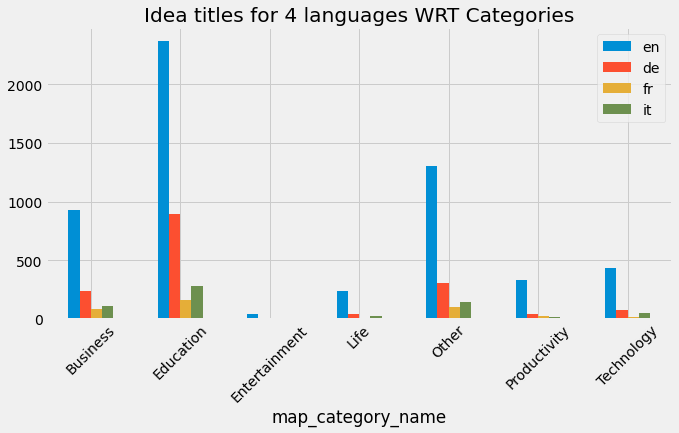

In [21]:
df_nm = ndf.copy()
en = df_nm[df_nm["idea_title_lang"]=="en"].groupby("map_category_name").size()
de = df_nm[df_nm["idea_title_lang"]=="de"].groupby("map_category_name").size()
fr = df_nm[df_nm["idea_title_lang"]=="fr"].groupby("map_category_name").size()
it = df_nm[df_nm["idea_title_lang"]=="it"].groupby("map_category_name").size()
df_lang = pd.concat([en, de, fr,it], axis=1)

df_lang.columns=["en","de","fr","it"]
df_lang.plot.bar(figsize=(10,5), rot=45)
plt.title("Idea titles for 4 languages WRT Categories")
plt.show()

Comment: English is leading language for all categories

In the following we show the first 20 in the most frequent ideas and map titles

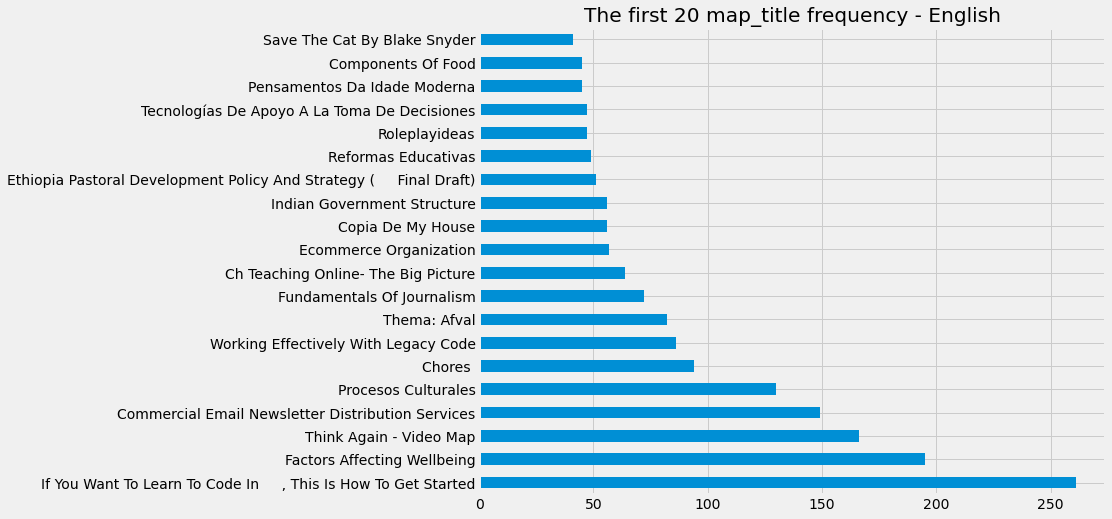

In [22]:
df_nm["map_title"] = df_nm["map_title"].str.title()
df_nm["idea_title"] = df_nm["idea_title"].str.title()
import warnings
warnings.filterwarnings("ignore")
df_nm[df_nm["map_title_lang"]=="en"]['map_title'].value_counts()[:20].plot(kind='barh', figsize=(10,8))
# df_nm['map_title'].value_counts()[:20].plot(kind='bar', figsize=(25,5))
plt.title("The first 20 map_title frequency - English")
plt.show()

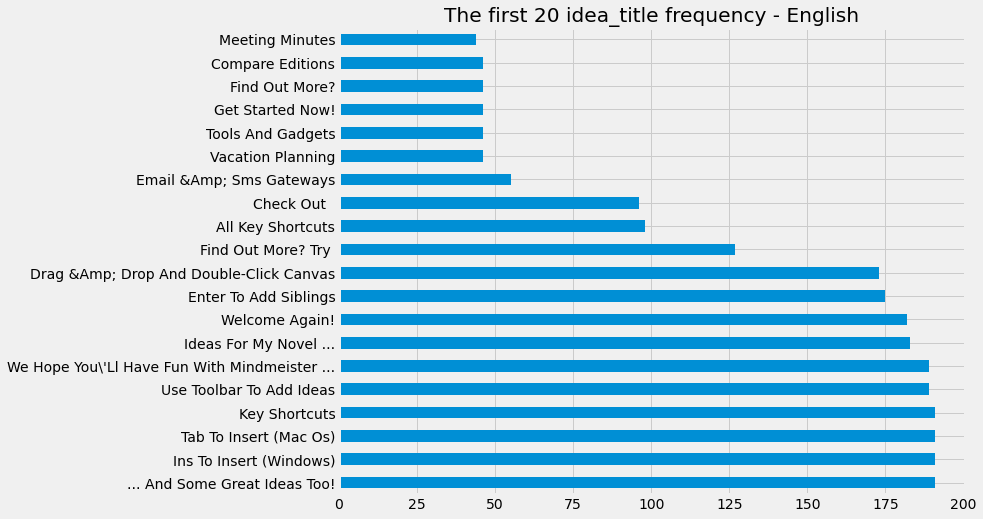

In [23]:
import warnings
warnings.filterwarnings("ignore")
df_nm[df_nm["idea_title_lang"]=="en"]['idea_title'].value_counts()[:20].plot(kind='barh', figsize=(10,8))
# df_nm['map_title'].value_counts()[:20].plot(kind='bar', figsize=(25,5))
plt.title("The first 20 idea_title frequency - English")
plt.show()

Map rating is one of the most meaningful feature.

Let us check its attributes WRT to Categories

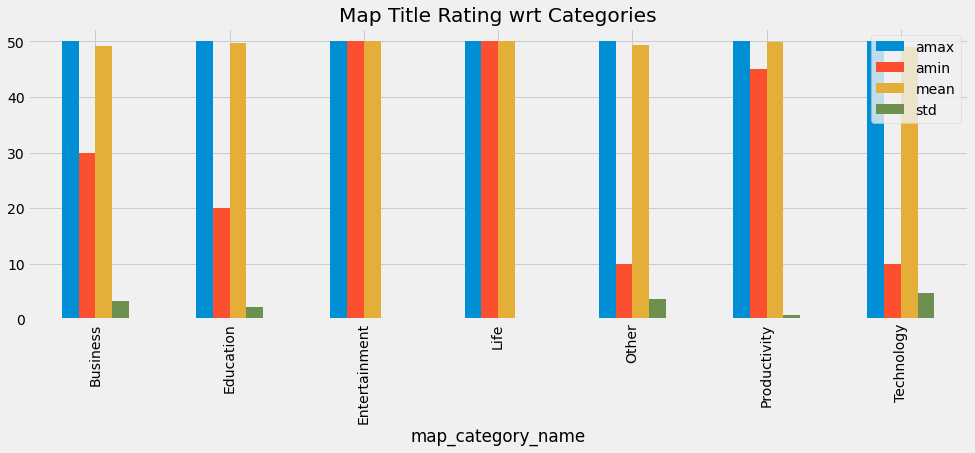

In [24]:
import numpy as np
df_nm.groupby("map_category_name")["map_rating"].agg((np.max,np.min,np.mean, np.std)).plot.bar(figsize=(15,5))
plt.title("Map Title Rating wrt Categories")
plt.show()

Most of the values are 50, hence the mean is almost 50. This can not be very useful information

## Textual Analysıs

Two features are textual. We can do some textual analysis on them. But since there are different languages used in the data we need to study them seperatly.



In [25]:
# import some librarries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [26]:
# This dataframe will have all the rows that has the map_title in English Language 
df_en_idea_title = ndf[ndf["idea_title_lang"]=="en"]

In [27]:
df_en_idea_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5649 entries, 1 to 13558
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   map_id             5649 non-null   int64 
 1   map_title          5649 non-null   object
 2   map_rating         5649 non-null   int64 
 3   map_category_name  5649 non-null   object
 4   idea_id            5649 non-null   int64 
 5   idea_parent_id     5649 non-null   int64 
 6   idea_title         5649 non-null   object
 7   map_title_lang     5649 non-null   object
 8   idea_title_lang    5649 non-null   object
dtypes: int64(4), object(5)
memory usage: 441.3+ KB


In [28]:
df_en_idea_title["idea_title"].sample(20,random_state=5).to_list()

['Physical Products',
 'TAB to insert (Mac OS)',
 'TAB to insert (Mac OS)',
 'Communism was feared, so America had the idea that they should step in to prevent it. Policymakers strongly thought that the United States should control political coniditons. ',
 'Princeton Architecture Press',
 'Check out  ',
 'Using our Facebook  &quot;Lakeshore Lancer Soccer&quot; page',
 'Use Cases &amp; Templates',
 'Use toolbar to add ideas',
 'Right Side Modules',
 'Welcome again!',
 'Check out  ',
 'Welcome again!',
 'Development of scenario -   k  st,   k additional',
 'Potential year-long job',
 'TENDER: ( ) patient safety: establishing an integrated umbrella network to improve cooperation in the field of patient safety, focusing on cultures, leadership and clinical governance, reporting and learning mechanisms, sharing of best practices and stake',
 'Use toolbar to add ideas',
 'Publishing monthly newsletters',
 'ENTER to add siblings',
 'Ideas for my novel ...']

In [29]:
# convert string & lower case and creating new features map_title_txt
df_en_idea_title['idea_title_txt'] = df_en_idea_title['idea_title'].astype(str).apply(lambda x: " ".join(x.lower() for x in x.split()))

In [30]:
# let's see some sample
df_en_idea_title['idea_title_txt'].sample(20, random_state=5)

10355                                    physical products
1795                                tab to insert (mac os)
10106                               tab to insert (mac os)
12939    communism was feared, so america had the idea ...
2540                          princeton architecture press
5827                                             check out
6617     using our facebook &quot;lakeshore lancer socc...
7565                             use cases &amp; templates
2789                              use toolbar to add ideas
13153                                   right side modules
4137                                        welcome again!
4930                                             check out
10234                                       welcome again!
8952          development of scenario - k st, k additional
8865                               potential year-long job
10065    tender: ( ) patient safety: establishing an in...
9087                              use toolbar to add ide

In [31]:
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])
stop = stopwords.words('english')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [32]:
def cln_email_web(txt):
  txt = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', txt)
  txt = re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*', "", txt)
  return txt

In [33]:
df_en_idea_title['idea_title_txt'] = df_en_idea_title['idea_title_txt'].apply(cln_email_web)
df_en_idea_title.sample(20, random_state=5)["idea_title_txt"]

10355                                    physical products
1795                                tab to insert (mac os)
10106                               tab to insert (mac os)
12939    communism was feared, so america had the idea ...
2540                          princeton architecture press
5827                                             check out
6617     using our facebook &quot;lakeshore lancer socc...
7565                             use cases &amp; templates
2789                              use toolbar to add ideas
13153                                   right side modules
4137                                        welcome again!
4930                                             check out
10234                                       welcome again!
8952          development of scenario - k st, k additional
8865                               potential year-long job
10065    tender: ( ) patient safety: establishing an in...
9087                              use toolbar to add ide

In [34]:
# remove stop words
df_en_idea_title['idea_title_txt'] = df_en_idea_title['idea_title_txt'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_en_idea_title.sample(20, random_state=5)['idea_title_txt']

10355                                    physical products
1795                                   tab insert (mac os)
10106                                  tab insert (mac os)
12939    communism feared, america idea step prevent it...
2540                          princeton architecture press
5827                                                 check
6617     using facebook &quot;lakeshore lancer soccer&q...
7565                             use cases &amp; templates
2789                                 use toolbar add ideas
13153                                   right side modules
4137                                        welcome again!
4930                                                 check
10234                                       welcome again!
8952             development scenario - k st, k additional
8865                               potential year-long job
10065    tender: ( ) patient safety: establishing integ...
9087                                 use toolbar add ide

In [35]:
# Do more cleaning
import string
df_en_idea_title['idea_title_txt'] = df_en_idea_title['idea_title_txt'].str.replace('[{}]'.format(string.punctuation), '')
df_en_idea_title['idea_title_txt'] = df_en_idea_title['idea_title_txt'].str.replace('\\',' ')
# df_en_idea_title['idea_title_txt'] = df_en_idea_title['idea_title_txt'].str.replace('...','', regex=False)
df_en_idea_title['idea_title_txt'] = df_en_idea_title['idea_title_txt'].str.strip()
df_en_idea_title.sample(30, random_state=10)['idea_title_txt']

8752                                               inition
10009                               email amp sms gateways
4252                      put disposable protective sheath
8445     range services provided across group  where op...
3852                                 greg anonna mean this
5787                            overcome illness adversity
1477                                           ideas novel
1458                         developing world  third world
3400                                     tab insert mac os
7654                                         key shortcuts
11682          thin wires twisted help cancel interference
8423              technical architect technical specialist
12544                                      great ideas too
2715                                         key shortcuts
9927                                         key shortcuts
3605                           hope you ll fun mindmeister
13101                                        find more t

In [36]:
# from pprint import pprint
df_en_idea_title['map_title_token'] = df_en_idea_title['idea_title_txt'].apply(lambda row: nltk.word_tokenize(row))
print(" "*10+"Tokenized idea_title words".upper()+" "*20+"\n")
print(df_en_idea_title['map_title_token'].head())
print("\n")
frq_words = nltk.FreqDist(sum(df_en_idea_title['map_title_token'].to_list(), []))
print(" "*10+"Most common words with repating numbers in idea_title".upper()+" "*20+"\n")
for word in frq_words.most_common(50):
  print(word)

print("\n")
print(" "*10+"Words Frequency Distrubition in idea_title(show only most common 10)".upper()+" "*20+"\n")
frq_words = nltk.FreqDist(sum(df_en_idea_title['map_title_token'].to_list(), []))

frq_words.tabulate(10)

          TOKENIZED IDEA_TITLE WORDS                    

1                       [ideas, novel]
2                     [welcome, again]
3    [hope, you, ll, fun, mindmeister]
4                  [great, ideas, too]
6           [use, toolbar, add, ideas]
Name: map_title_token, dtype: object


          MOST COMMON WORDS WITH REPATING NUMBERS IN IDEA_TITLE                    

('ideas', 580)
('insert', 384)
('add', 375)
('amp', 343)
('key', 304)
('shortcuts', 289)
('use', 224)
('great', 201)
('ins', 193)
('windows', 193)
('ll', 192)
('too', 192)
('tab', 192)
('you', 191)
('mac', 191)
('os', 191)
('hope', 190)
('fun', 190)
('mindmeister', 190)
('toolbar', 189)
('find', 187)
('novel', 183)
('again', 183)
('welcome', 182)
('enter', 177)
('drag', 177)
('drop', 177)
('doubleclick', 177)
('canvas', 176)
('siblings', 175)
('more', 173)
('try', 130)
('check', 104)
('s', 100)
('new', 78)
('get', 78)
('life', 76)
('email', 64)
('sms', 55)
('gateways', 55)
('one', 54)
('started', 53)
('now', 53)
('p

In [37]:
# df_en_idea_title['map_title_token_len'] = df_en_idea_title['map_title_token'].apply(lambda x: len(x))
# df_en_idea_title.head()

There are some words that can help us idetfy some important concept in the text, like windows, mac, os. We can find out which records include thse text

In [38]:
# These word must be decided out of experince

df_win_records = df_en_idea_title[df_en_idea_title['idea_title'].str.contains("Windows")==True]

What we see is that 192 records idea title relates to windows

In [39]:
display(df_win_records)

,map_id,map_title,map_rating,map_category_name,idea_id,idea_parent_id,idea_title,map_title_lang,idea_title_lang,idea_title_txt,map_title_token
8,116533,PFK/Risikomanagement,50,Business,116541,116540,INS to insert (Windows),id,en,ins insert windows,"[ins, insert, windows]"
68,824870,st Century Teacher &amp; ICT,40,Business,824879,824878,INS to insert (Windows),en,en,ins insert windows,"[ins, insert, windows]"
141,875331,модуль интернет-магазина,50,Business,875340,875339,INS to insert (Windows),ru,en,ins insert windows,"[ins, insert, windows]"
156,918624,Online Marketer Frühling,50,Business,918633,918632,INS to insert (Windows),de,en,ins insert windows,"[ins, insert, windows]"
170,1028364,Online Creative Toolkit,50,Business,1028373,1028372,INS to insert (Windows),en,en,ins insert windows,"[ins, insert, windows]"
...,...,...,...,...,...,...,...,...,...,...,...
13183,18975588,Sistema operativo Unix,50,Other,18975596,18975595,INS to insert (Windows),pt,en,ins insert windows,"[ins, insert, windows]"
13200,19008324,MERCADOTECNIA,50,Other,19008332,19008331,INS to insert (Windows),sw,en,ins insert windows,"[ins, insert, windows]"
13213,19044678,Phineas and Ferb,50,Other,19044687,19044686,INS to insert (Windows),en,en,ins insert windows,"[ins, insert, windows]"
13230,19122623,Paradigmas de programación,50,Other,19122632,19122631,INS to insert (Windows),es,en,ins insert windows,"[ins, insert, windows]"


# END NOTE

What can we do further?

We can apply the above approch to the map_title and look for specific records if we are provided some keywords.

We can use BERT based models to create QA model to querry on the dataset if we know what we are looking for.

We can also do sentiment analyis on the text columns with pretrained models.

We can create our specific dataset and retrain model on the dataset.

We can also do more classification.

We can use transferlearning for that. There are many efficient pretrained 

In [40]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 616 kB 22.7 MB/s 
     |████████████████████████████████| 120 kB 59.4 MB/s 
     |████████████████████████████████| 1.1 MB 58.9 MB/s 
     |████████████████████████████████| 87 kB 5.4 MB/s 
     |████████████████████████████████| 213 kB 40.7 MB/s 
     |████████████████████████████████| 1.2 MB 36.3 MB/s 
     |████████████████████████████████| 6.4 MB 49.2 MB/s 
     |████████████████████████████████| 77 kB 4.7 MB/s 
     |████████████████████████████████| 596 kB 42.8 MB/s 
     |████████████████████████████████| 1.1 MB 43.6 MB/s 
     |████████████████████████████████| 840 kB 36.4 MB/s 
     |████████████████████████████████| 3.4 MB 48.3 MB/s 
     |████████████████████████████████| 25.3 MB 1.8 MB/s 
     |████████████████████████████████| 99 kB 8.1 MB/s 
     |████████████████████████████████| 47.7 MB 87 kB/s 
     |████████████████████████████████| 352 kB 51.9 MB/s 
     |████████████████████████████████| 210 kB 44.9 MB/s 


## Using the Bert Model 

In [41]:
import numpy as np
import os

from tflite_model_maker import model_spec
from tflite_model_maker import text_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.text_classifier import AverageWordVecSpec
from tflite_model_maker.text_classifier import DataLoader

import tensorflow as tf
assert tf.__version__.startswith('2')
tf.get_logger().setLevel('ERROR')

In [42]:
data_dir = tf.keras.utils.get_file(
      fname='SST-2.zip',
      origin='https://dl.fbaipublicfiles.com/glue/data/SST-2.zip',
      extract=True)
data_dir = os.path.join(os.path.dirname(data_dir), 'SST-2')

7454720/7439277 [==============================] - 1s 0us/step


In [43]:
import pandas as pd

def replace_label(original_file, new_file):
  # Load the original file to pandas. We need to specify the separator as
  # '\t' as the training data is stored in TSV format
  df = pd.read_csv(original_file, sep='\t')

  # Define how we want to change the label name
  label_map = {0: 'negative', 1: 'positive'}

  # Excute the label change
  df.replace({'label': label_map}, inplace=True)

  # Write the updated dataset to a new file
  df.to_csv(new_file)

# Replace the label name for both the training and test dataset. Then write the
# updated CSV dataset to the current folder.
replace_label(os.path.join(os.path.join(data_dir, 'train.tsv')), 'train.csv')
replace_label(os.path.join(os.path.join(data_dir, 'dev.tsv')), 'dev.csv')

In [44]:
# spec = model_spec.get('mobilebert_classifier') # for the size is small bert
spec = model_spec.get('average_word_vec') # use for faster training

In [45]:
train_data = DataLoader.from_csv(
      filename='train.csv',
      text_column='sentence',
      label_column='label',
      model_spec=spec,
      is_training=True)
test_data = DataLoader.from_csv(
      filename='dev.csv',
      text_column='sentence',
      label_column='label',
      model_spec=spec,
      is_training=False)

In [46]:
model = text_classifier.create(train_data, model_spec=spec, epochs=10)

2104/2104 [==============================] - 18s 7ms/step - loss: 0.6789 - accuracy: 0.5666
Epoch 2/2
2104/2104 [==============================] - 11s 5ms/step - loss: 0.5550 - accuracy: 0.7244
Epoch 3/3
2104/2104 [==============================] - 12s 6ms/step - loss: 0.4390 - accuracy: 0.8001
Epoch 4/4
2104/2104 [==============================] - 12s 6ms/step - loss: 0.3931 - accuracy: 0.8275
Epoch 5/5
2104/2104 [==============================] - 13s 6ms/step - loss: 0.3698 - accuracy: 0.8423
Epoch 6/6
2104/2104 [==============================] - 11s 5ms/step - loss: 0.3545 - accuracy: 0.8508
Epoch 7/7
2104/2104 [==============================] - 12s 6ms/step - loss: 0.3432 - accuracy: 0.8571
Epoch 8/8
2104/2104 [==============================] - 12s 6ms/step - loss: 0.3366 - accuracy: 0.8608
Epoch 9/9
2104/2104 [==============================] - 12s 6ms/step - loss: 0.3297 - accuracy: 0.8631
Epoch 10/10
2104/2104 [==============================] - 13s 6ms/step - loss: 0.3254 - accur

In [47]:
loss, acc = model.evaluate(test_data)

28/28 [==============================] - 1s 22ms/step - loss: 0.5190 - accuracy: 0.8303


In [48]:
model.export(export_dir='average_word_vec')

# The rest

In [ ]:
# We can use this model for binary classification
# We need to convert

In [52]:
predict_data = DataLoader.from_csv(
      filename='dev.csv',
      text_column='sentence',
      label_column='label',
      model_spec=spec,
      is_training=False)

In [55]:
model.predict_top_k(predict_data)

[[('positive', 0.9998311)],
 [('negative', 0.8230129)],
 [('positive', 0.99827564)],
 [('positive', 0.97424316)],
 [('negative', 0.9871371)],
 [('positive', 0.99974054)],
 [('negative', 0.9294073)],
 [('negative', 0.852144)],
 [('positive', 0.93293923)],
 [('negative', 0.99917704)],
 [('positive', 0.99996805)],
 [('negative', 0.716537)],
 [('negative', 0.9952153)],
 [('positive', 0.75833726)],
 [('negative', 0.9463369)],
 [('positive', 0.99999774)],
 [('positive', 0.99075234)],
 [('positive', 0.99767095)],
 [('negative', 0.9588018)],
 [('negative', 0.79222405)],
 [('negative', 0.77491915)],
 [('positive', 0.6204411)],
 [('positive', 0.79150504)],
 [('positive', 0.99999344)],
 [('positive', 0.9666571)],
 [('negative', 0.9839462)],
 [('negative', 0.9550025)],
 [('positive', 0.9999901)],
 [('positive', 0.80566466)],
 [('negative', 0.95304793)],
 [('positive', 0.999671)],
 [('negative', 0.7788623)],
 [('positive', 0.99968445)],
 [('positive', 0.7105695)],
 [('negative', 0.995678)],
 [('neg